# Registering the arrays once they have been positioned

Once the array have been positioned so they are almost overlapping and the share approximatly the same shape the arrays can be registerd. There are different algorithms freely availabe, in this work it has been used ITK and its different bindings and also other free packages that use different methods. 
ITK it is considered one of the most relaiable software for image registration and segementation, however have been considered also other alternatives like ImageJ and Hugin.  A more detailed list can be found [here](http://pyimreg.github.io/)

### Test images
In this case we used the output of the positioning using QGIS, hence the matrix are converted from GOETIFF files.
The results however apply also to array extacted from the raw data.

In [2]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as plt

In [3]:
aco = r"/home/opdate/Desktop/spie/Patinated_1_2/rast_extent/test/ACOUSTI_0_4_REND.tif"
con = r"/home/opdate/Desktop/spie/Patinated_1_2/rast_extent/test/CONO_0_4_TEST.tif"
aco_ar = ndimage.imread(aco, flatten=False, mode=None)
con_ar = ndimage.imread(con, flatten=False, mode=None)

con_ar_sc =  misc.imresize(con_ar, aco_ar.shape, interp='nearest')

FI = con_ar[:,:,1]
MI = aco_ar[:,:,1]

## Registration using Imreg_dft 
imreg_dft implements DFT based technique for translation, rotation and scale-invariant image registration. Is based on the following publications:

    [1]	An FFT-based technique for translation, rotation and scale-invariant image registration. BS Reddy, BN Chatterji. IEEE Transactions on Image Processing, 5, 1266-1271, 1996
    [2]	An IDL/ENVI implementation of the FFT-based algorithm for automatic image registration. H Xiea, N Hicksa, GR Kellera, H Huangb, V Kreinovich. Computers & Geosciences, 29, 1045-1055, 2003.
    [3]	Image Registration Using Adaptive Polar Transform. R Matungka, YF Zheng, RL Ewing. IEEE Transactions on Image Processing, 18(10), 2009.
    
The result of this techniuque is however not good when there are some difference in the images. The algorithm requires images with exactly the same size, and this sometimes could require some further time consuming adjustment to the array size.

/usr/local/lib/python2.7/dist-packages/imreg_dft/imreg.py:706: RuntimeWarning: divide by zero encountered in true_divide
  phase_norm = np.median(np.angle(im2 / im0) % (2 * np.pi))


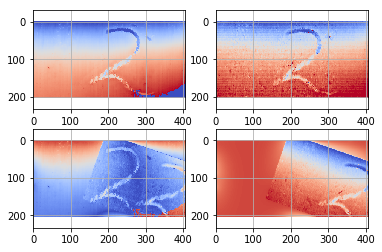

In [4]:

import imreg_dft
im = imreg_dft.imreg.similarity( -aco_ar[:,:,0],con_ar_sc[:,:,0], numiter= 1, order=1,
                                constraints=None, filter_pcorr=0,
                                exponent='inf', reports=None)

imreg_dft.imreg.imshow(-aco_ar[:,:,0], con_ar_sc[:,:,0], im['timg'], cmap=None, fig=None)


## Registration using SimpleITK

Better result have been achieved using SipleITK:

    SimpleITK is a simplified layer built on top of ITK, intended to facilitate its use in rapid prototyping, education, interpreted languages. 
    
The same shape of the two arrays is not required. Different kind of transformation can be used.

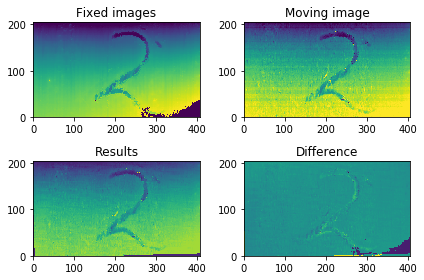

In [20]:
import SimpleITK as sitk
fixedImage = sitk.GetImageFromArray(-aco_ar[:,:,0])
movingImage = sitk.GetImageFromArray(con_ar_sc[:,:,0])
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.LogToConsoleOn()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("rigid"))
elastixImageFilter.Execute()
res = elastixImageFilter.GetResultImage()
hi = sitk.GetArrayFromImage(res)

fig2 = plt.figure()
ax1t = fig2.add_subplot(221)
ax1t.pcolormesh(np.flipud(-aco_ar[:,:,0]))
ax1t.set_title('Fixed images')
ax2t = fig2.add_subplot(222)
ax2t.pcolormesh(np.flipud(con_ar_sc[:,:,0]))
ax2t.set_title('Moving image')
ax3t = fig2.add_subplot(223)
ax3t.pcolormesh(np.flipud(hi))
ax3t.set_title('Results')
ax4t = fig2.add_subplot(224)
ax4t.pcolormesh(np.flipud(-aco_ar[:,:,0]-hi))
ax4t.set_title('Difference')
plt.tight_layout()
plt.show()

Bisides the match performs better the misalignment can be soon noticed when comparing two profiles.

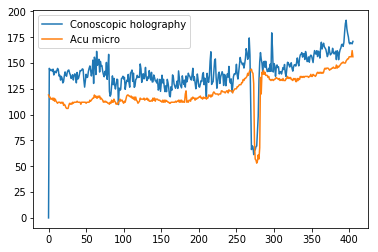

In [23]:
fig3 = plt.figure()
ax4 = fig3.add_subplot(111)
ax4.plot(hi[70],label='Conoscopic holography')
ax4.plot(-aco_ar[70,:,0],label='Acoustic microscopy')
ax4.legend()
plt.show()

In [11]:
for i in range(1000):
    print "HIDE ME!"
a = 5

HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
HIDE ME!
H

In [12]:
print a

5
